In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add root path (parent folder) to path
import os
import sys
cwd = os.getcwd()
root_path = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.insert(0, root_path)

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

## run for all cells (OFF LINE)

run
```
python3 stcl_batch.py [DATASET] --dim D
```

datasets
* 20180618
* 20180621
* 20180626

## choose dataset

In [2]:
dataset_name = "20180618"
# dataset_name = "20180621"
# dataset_name = "20180626"

## load stim and spike data

In [3]:
# data_folder_name = "data"
# stim, spike_train, info = pysta.load_data(dataset_name, data_folder_name)

# # channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]   # NOT NEEDED ANYMORE
# # info["channel_names"]
# # info["cell_types"]

In [4]:
# # calc number of spikes
# tap = 8 # -700 ms ~ 0

# num_samples = list()
# num_spikes = list()
# for idx in range(spike_train.shape[0]):    
#     spike_triggered_stim, spike_count = pysta.grab_spike_triggered_stim(stim, spike_train[idx], tap)
    
#     num_samples.append(spike_triggered_stim.shape[0])
#     num_spikes.append(np.sum(spike_count))

# num_samples_df = pd.DataFrame({"channel_name": info["channel_names"], "number_of_samples": num_samples, "number_of_spikes": num_spikes})
# # num_samples_df

In [5]:
## read largest eigenvalues from STC results

# folder_name = "{}_tap{}_stc_classic".format(dataset_name, tap)

# largest_eigen_values = list()
# second_largest_eigen_values = list()
# third_largest_eigen_values = list()
# for channel_name in info["channel_names"]:
#     filename = "ch_{}_eig_val.txt".format(channel_name)
#     #print(os.path.join(folder_name,filename))    
#     eigs = np.loadtxt(os.path.join(folder_name,filename))
#     largest_eigen_values.append(eigs[0])
#     second_largest_eigen_values.append(eigs[1])
#     third_largest_eigen_values.append(eigs[2])    
# largest_eigen_values_df = pd.DataFrame({"channel_name": info["channel_names"], "eig1": largest_eigen_values, "eig2": second_largest_eigen_values, "eig3": third_largest_eigen_values})

# largest_eigen_values_df.hist()

## read clustering results

In [6]:
tap = 8 # -700 ms ~ 0
cluster_dim = 2


results_path = os.path.join(root_path,'results')


folder_name = os.path.join(results_path, "binary_stim_{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, cluster_dim))
filename = os.path.join(folder_name, "clusters.csv")

clusters = pd.read_csv(filename)
# weights
# weights.head()
# clusters.head()


# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)
clusters.head()

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
0,12a,1978,0.469666,0.038540,0.971392,0.754007,0.737358,True,0.522711,0.045648,0.636834,0.370558,0.036202,0.363166,0.420599
1,12b,1228,0.278502,0.029235,0.920008,0.895442,0.871839,True,0.262921,0.028102,0.657218,0.434911,0.056574,0.342782,0.252902
2,12c,59,0.423729,0.068445,4.805753,3.790327,3.660127,True,0.438596,0.068882,0.982759,1.000000,0.499813,0.017241,-0.280702
3,13a,963,0.369678,0.033203,1.113298,1.056309,1.029772,True,0.366133,0.032059,0.899287,0.797753,0.109916,0.100713,0.466382
4,13b,415,0.575904,0.034440,1.266391,1.249651,1.216659,True,0.601974,0.038445,0.614331,0.504505,0.059151,0.385669,0.184996


In [7]:
# load cell type info (by STA)
data_path = os.path.join(root_path,'data', 'binary_stim')
cell_types = pd.read_csv(os.path.join(data_path, "{}_cell_type.csv".format(dataset_name)))
cell_types.rename(columns={'cell_type': 'sta_cell_type'}, inplace=True)
# cell_types
clusters = clusters.merge(cell_types, on='channel_name')
clusters.to_csv(os.path.join(folder_name, "clusters_.csv"), index=None)

## check some statistics

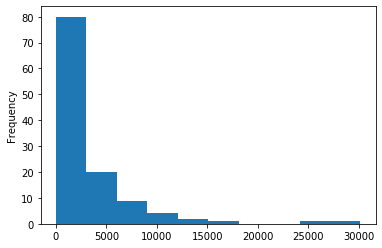

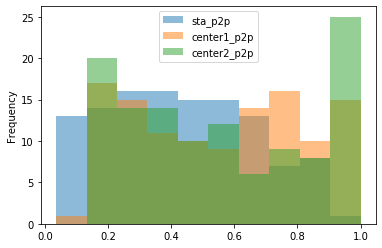

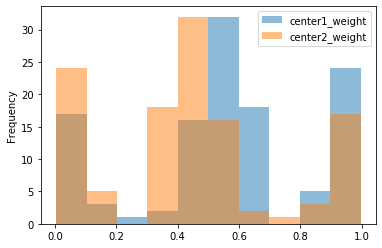

In [8]:
clusters['num_spikes'].plot.hist()
clusters[['sta_p2p', 'center1_p2p', 'center2_p2p']].plot.hist(alpha=0.5)
clusters[['center1_weight', 'center2_weight']].plot.hist(alpha=0.5)


## max weights

(array([18., 19.,  5.,  8.,  8.,  6.,  2.,  2.,  1.,  0.,  0.,  0.,  1.,
         5.,  1.,  3.,  8., 16., 15.]),
 array([0.5       , 0.52631579, 0.55263158, 0.57894737, 0.60526316,
        0.63157895, 0.65789474, 0.68421053, 0.71052632, 0.73684211,
        0.76315789, 0.78947368, 0.81578947, 0.84210526, 0.86842105,
        0.89473684, 0.92105263, 0.94736842, 0.97368421, 1.        ]),
 <a list of 19 Patch objects>)

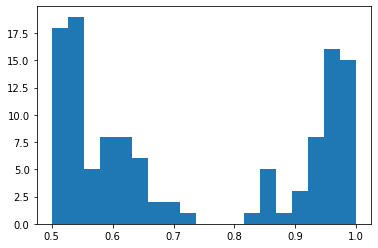

In [9]:
# check max_weight
clusters["max_weight"] = np.maximum(clusters["center1_weight"], clusters["center2_weight"])

bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
# plt.savefig("figure/max_weight_hist.png")

## peak-to-peak difference

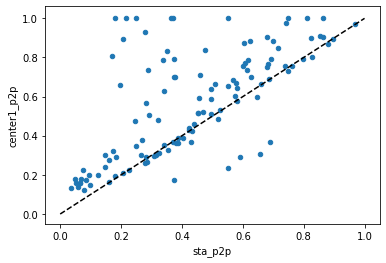

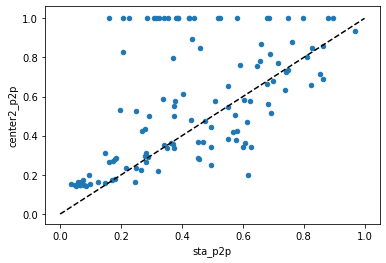

In [10]:
clusters.plot.scatter("sta_p2p", "center1_p2p")
plt.plot([0,1], [0,1], 'k--')
clusters.plot.scatter("sta_p2p", "center2_p2p")
plt.plot([0,1], [0,1], 'k--')

# clusters.plot.scatter("PSNR", "PSNR1")
# plt.plot([5,25], [5,25], 'k--')
# clusters.plot.scatter("PSNR", "PSNR2")
# plt.plot([5,25], [5,25], 'k--')

In [11]:
idx_p2p_increased1 = np.where(clusters["sta_p2p"] < clusters["center1_p2p"])
idx_p2p_increased2 = np.where(clusters["sta_p2p"] < clusters["center2_p2p"])

clusters.iloc[np.union1d(idx_p2p_increased1, idx_p2p_increased2)]

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,max_weight
0,12a,1978,0.469666,0.038540,0.971392,0.754007,0.737358,True,0.522711,0.045648,0.636834,0.370558,0.036202,0.363166,0.420599,OFF,0.636834
1,12b,1228,0.278502,0.029235,0.920008,0.895442,0.871839,True,0.262921,0.028102,0.657218,0.434911,0.056574,0.342782,0.252902,ON,0.657218
2,12c,59,0.423729,0.068445,4.805753,3.790327,3.660127,True,0.438596,0.068882,0.982759,1.000000,0.499813,0.017241,-0.280702,unknown,0.982759
3,13a,963,0.369678,0.033203,1.113298,1.056309,1.029772,True,0.366133,0.032059,0.899287,0.797753,0.109916,0.100713,0.466382,OFF,0.899287
4,13b,415,0.575904,0.034440,1.266391,1.249651,1.216659,True,0.601974,0.038445,0.614331,0.504505,0.059151,0.385669,0.184996,ON,0.614331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,84c,103,0.864078,0.060231,2.993966,2.586619,2.475002,True,1.000000,0.398001,0.019606,0.860000,0.060176,0.980394,0.718333,OFF,0.980394
114,86a,397,0.173804,0.025393,1.119607,1.099539,1.066672,True,0.323810,0.046646,0.527063,0.272727,0.048477,0.472937,-0.499312,unknown,0.527063
115,86b,175,0.308571,0.043014,2.811291,2.604743,2.361201,True,0.294479,0.043853,0.955000,1.000000,0.226028,0.045000,-0.228272,unknown,0.955000
116,86c,54,0.518519,0.082574,7.686665,6.057513,5.725262,True,0.487805,0.080109,0.866708,1.000000,0.220800,0.133292,0.403377,unknown,0.866708


In [12]:
clusters.iloc[np.intersect1d(idx_p2p_increased1, idx_p2p_increased2)]

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,max_weight
2,12c,59,0.423729,0.068445,4.805753,3.790327,3.660127,True,0.438596,0.068882,0.982759,1.000000,0.499813,0.017241,-0.280702,unknown,0.982759
6,13d,304,0.342105,0.045892,2.188207,2.152215,2.078986,True,0.628571,0.108665,0.182005,0.354701,0.048073,0.817995,0.165507,unknown,0.817995
8,14b,1212,0.267327,0.023897,0.795804,0.766490,0.746218,True,0.380023,0.031486,0.563803,0.425220,0.042866,0.436197,-0.109984,ON,0.563803
9,17a,5929,0.066453,0.007862,0.436700,0.434049,0.430598,True,0.157592,0.024853,0.500030,0.150404,0.024742,0.499970,-0.252092,unknown,0.500030
10,17b,2553,0.096749,0.011362,0.570595,0.559954,0.552507,True,0.148870,0.028227,0.500642,0.153543,0.027519,0.499358,-0.266945,unknown,0.500642
11,17c,1129,0.179805,0.020359,0.803036,0.785536,0.764401,True,0.195707,0.022549,0.578443,0.278932,0.038309,0.421557,0.041335,unknown,0.578443
12,17d,403,0.171216,0.028481,1.387623,1.357244,1.337145,True,0.806452,0.142948,0.056115,0.174731,0.028477,0.943885,-0.002732,unknown,0.943885
17,21e,99,0.292929,0.051447,2.766961,2.606345,2.525943,True,0.508475,0.079195,0.614925,0.500000,0.089716,0.385075,-0.957627,unknown,0.614925
19,22b,370,0.524324,0.056708,2.560741,2.536986,2.452073,True,0.529070,0.058151,0.941241,1.000000,0.192811,0.058759,0.442419,OFF,0.941241
22,23b,4619,0.195930,0.016340,0.700543,0.608037,0.595794,True,0.659805,0.036753,0.526504,0.530046,0.029570,0.473496,-0.357312,ON,0.526504


In [13]:
clusters_with_negative_inner_product = clusters.loc[clusters["centers_inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product

58 118


,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,max_weight
2,12c,59,0.423729,0.068445,4.805753,3.790327,3.660127,True,0.438596,0.068882,0.982759,1.000000,0.499813,0.017241,-0.280702,unknown,0.982759
7,14a,5973,0.622300,0.024144,0.620785,0.571746,0.562778,True,0.881822,0.034057,0.652595,0.576627,0.034871,0.347405,-0.223442,ON,0.652595
8,14b,1212,0.267327,0.023897,0.795804,0.766490,0.746218,True,0.380023,0.031486,0.563803,0.425220,0.042866,0.436197,-0.109984,ON,0.563803
9,17a,5929,0.066453,0.007862,0.436700,0.434049,0.430598,True,0.157592,0.024853,0.500030,0.150404,0.024742,0.499970,-0.252092,unknown,0.500030
10,17b,2553,0.096749,0.011362,0.570595,0.559954,0.552507,True,0.148870,0.028227,0.500642,0.153543,0.027519,0.499358,-0.266945,unknown,0.500642
12,17d,403,0.171216,0.028481,1.387623,1.357244,1.337145,True,0.806452,0.142948,0.056115,0.174731,0.028477,0.943885,-0.002732,unknown,0.943885
16,21d,86,0.372093,0.063263,5.168798,4.807885,3.743672,True,1.000000,0.321856,0.035016,0.358025,0.064724,0.964984,-0.297531,unknown,0.964984
17,21e,99,0.292929,0.051447,2.766961,2.606345,2.525943,True,0.508475,0.079195,0.614925,0.500000,0.089716,0.385075,-0.957627,unknown,0.614925
22,23b,4619,0.195930,0.016340,0.700543,0.608037,0.595794,True,0.659805,0.036753,0.526504,0.530046,0.029570,0.473496,-0.357312,ON,0.526504
23,24a,27035,0.551766,0.021419,0.474165,0.467572,0.462520,True,0.654213,0.032030,0.542316,0.384765,0.030249,0.457684,-0.073787,OFF,0.542316


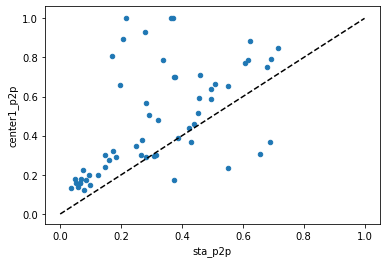

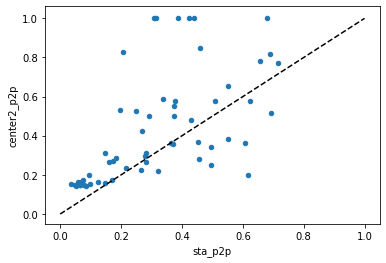

In [14]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("sta_p2p", "center1_p2p")
plt.plot([0,1], [0,1], 'k--')
clusters_with_negative_inner_product.plot.scatter("sta_p2p", "center2_p2p")
plt.plot([0,1], [0,1], 'k--')

## re-calc peak diff

In [15]:
# #folder_name
# sta_diff = list()
# cluster_diff = list()
# for ch_name in clusters['channel_name']:
#     data = np.load(os.path.join(folder_name, ch_name + '.npz'))
#     sta = data['sta']
#     centers = data['group_centers']
    
#     sta_diff.append(np.max(sta) - np.min(sta))
#     cluster_diff.append(np.max(data['group_centers'], axis=1) - np.min(data['group_centers'], axis=1))
# # sta_diff
# cluster_diff = np.array(cluster_diff)
# cluster_diff.shape    

In [16]:
# # add to df
# clusters['peak_diff'] = sta_diff
# clusters['peak_diff1'] = cluster_diff[:,0]
# clusters['peak_diff2'] = cluster_diff[:,1]

# filename = os.path.join(folder_name, "clusters_.csv")
# clusters.to_csv(filename, index=None)

In [17]:
# # double check
# clusters.plot.scatter('sta_p2p', "peak_diff")
# clusters.plot.scatter('center1_p2p', "peak_diff1")
# clusters.plot.scatter('center2_p2p', "peak_diff2")



In [18]:
# clusters.plot.scatter("peak_diff", "peak_diff1")
# plt.plot([0, 1], [0, 1], 'k--')
# clusters.plot.scatter("peak_diff", "peak_diff2")
# plt.plot([0, 1], [0, 1], 'k--')

In [19]:
# clusters.plot.scatter("num_spikes", "peak_diff")
# clusters.plot.scatter("num_spikes", "peak_diff1")
# clusters.plot.scatter("num_spikes", "peak_diff2")

In [20]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

# analyze for each cell type

### histogram of  innerproduct for each cell type

In [21]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee009ae9d0>,
      dtype=object)

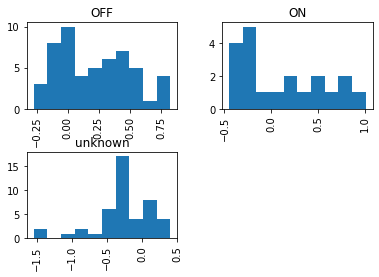

In [22]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["centers_inner_product"].hist(by=clusters["sta_cell_type"])

<Figure size 1080x720 with 0 Axes>

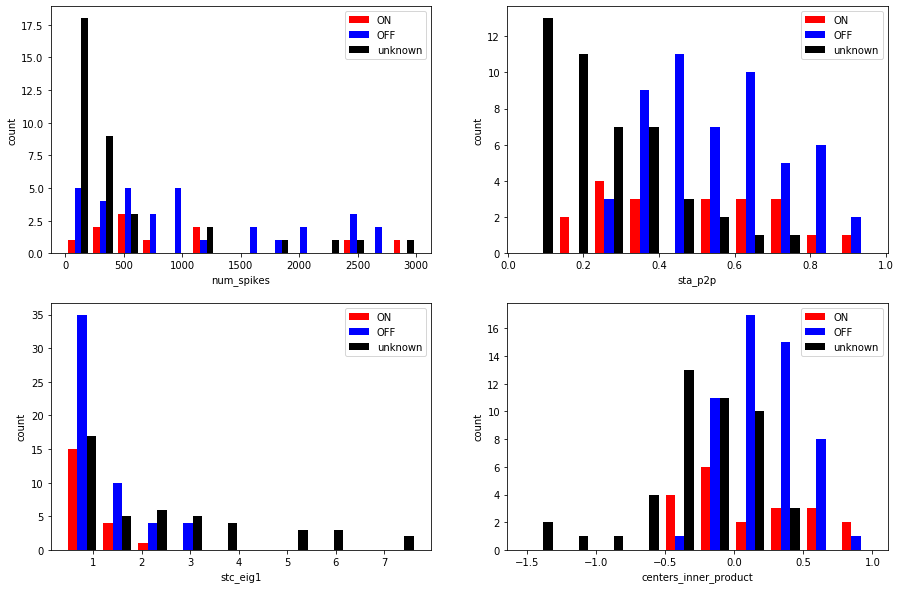

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(clusters, "num_spikes", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"],
                         bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_group(clusters, "sta_p2p", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(223)
pysta.plot_hist_by_group(clusters, "stc_eig1", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(224)
pysta.plot_hist_by_group(clusters, "centers_inner_product", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(dataset_name, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(dataset_name, tap, cluster_dim))

## Focus on data with enough samples

48
OFF        25
unknown    12
ON         11
Name: sta_cell_type, dtype: int64


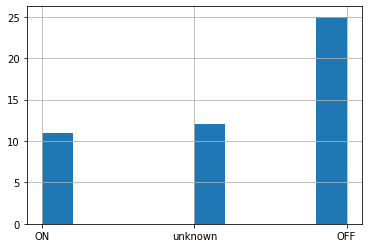

In [26]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["sta_cell_type"].value_counts())

clusters_with_enough_samples["sta_cell_type"].hist()

In [27]:
idx_unknown = clusters_with_enough_samples["sta_cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,sta_cell_type,max_weight
9,17a,5929,0.066453,0.007862,0.436700,0.434049,0.430598,True,0.157592,0.024853,0.500030,0.150404,0.024742,0.499970,-0.252092,unknown,0.500030
10,17b,2553,0.096749,0.011362,0.570595,0.559954,0.552507,True,0.148870,0.028227,0.500642,0.153543,0.027519,0.499358,-0.266945,unknown,0.500642
45,36a,5207,0.048012,0.008302,0.468460,0.461560,0.458992,True,0.176914,0.026486,0.493741,0.148176,0.025094,0.506259,-0.269621,unknown,0.506259
64,46a,3505,0.058773,0.009545,0.495557,0.494839,0.488377,True,0.140573,0.026443,0.513185,0.162626,0.027612,0.486815,-0.280736,unknown,0.513185
65,46b,2306,0.069818,0.011305,0.558057,0.554718,0.549498,True,0.177100,0.028230,0.514390,0.165751,0.029871,0.485610,-0.300520,unknown,0.514390
66,48a,14220,0.034459,0.006513,0.403161,0.400882,0.396751,True,0.131375,0.022362,0.510160,0.152468,0.024686,0.489840,-0.239192,unknown,0.510160
67,48b,4660,0.146567,0.010218,0.482386,0.475528,0.473101,True,0.241581,0.029331,0.484535,0.158652,0.024099,0.515465,-0.257016,unknown,0.515465
75,54c,3407,0.122982,0.011638,0.522441,0.521627,0.513524,True,0.200490,0.029799,0.490442,0.162162,0.026592,0.509558,-0.267702,unknown,0.509558
81,56a,4597,0.053078,0.007924,0.459829,0.444439,0.441194,True,0.158465,0.026382,0.469885,0.140741,0.022594,0.530115,-0.240901,unknown,0.530115
89,65a,11838,0.064453,0.006986,0.406875,0.401705,0.400679,True,0.156412,0.023206,0.499581,0.147577,0.024325,0.500419,-0.239070,unknown,0.500419


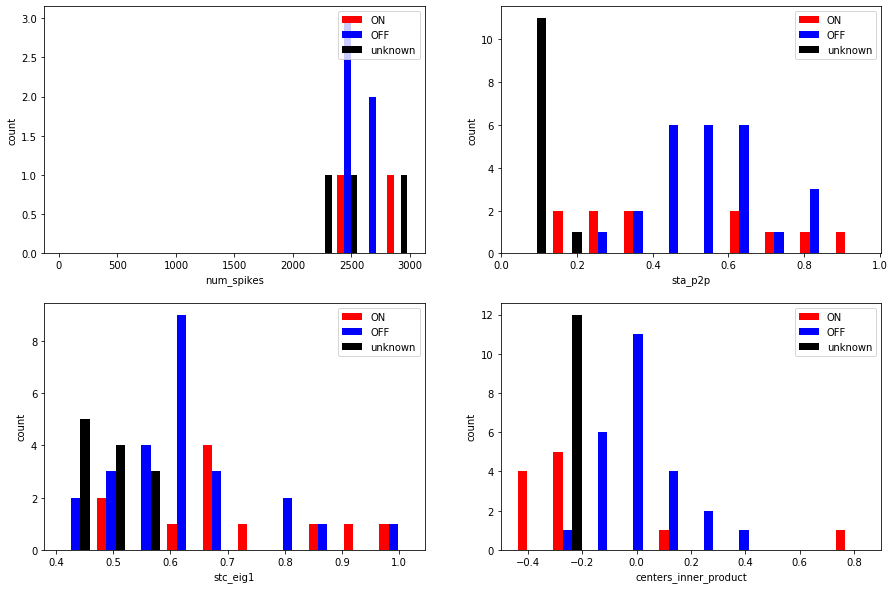

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(clusters_with_enough_samples, "num_spikes", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"],
                         bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_group(clusters_with_enough_samples, "sta_p2p", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(223)
pysta.plot_hist_by_group(clusters_with_enough_samples, "stc_eig1", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])
plt.subplot(224)
pysta.plot_hist_by_group(clusters_with_enough_samples, "centers_inner_product", 
                         'sta_cell_type', group_order=["ON", "OFF", "unknown"], group_color=["r", "b", "k"])

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(dataset_name, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(dataset_name, tap, cluster_dim))

dim= 2
20180618 22b


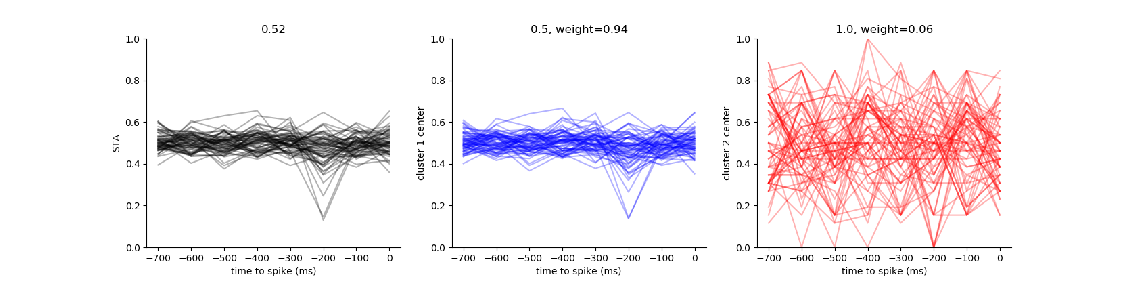

dim= 3
20180618 22b


FileNotFoundError: [Errno 2] No such file or directory: '/Users/yyoo/src/pysta2/results/binary_stim_20180618_tap8_cov_classic_cluster_dim3/22b_centers.png'

In [29]:
base_folder_name =  folder_name[:-1]
channel_name = "22b"
# channel_name = "36c"
# channel_name = "62b"

# channel_name = "42a"
# channel_name = "56b"
# channel_name = "62a"
for d in range(2, 6):
    print("dim=",d)
    print(dataset_name, channel_name)
    im = plt.imread(os.path.join(base_folder_name + "{}".format(d), channel_name + "_centers.png"))
    
    plt.figure(figsize=(20,8))
    plt.imshow(im)
    plt.box('off')
    plt.axis('off')
    plt.show()

dim= 2
20180618 22b
dim= 3
20180618 22b


FileNotFoundError: [Errno 2] No such file or directory: '/Users/yyoo/src/pysta2/results/binary_stim_20180618_tap8_cov_classic_cluster_dim3/22b.npz'

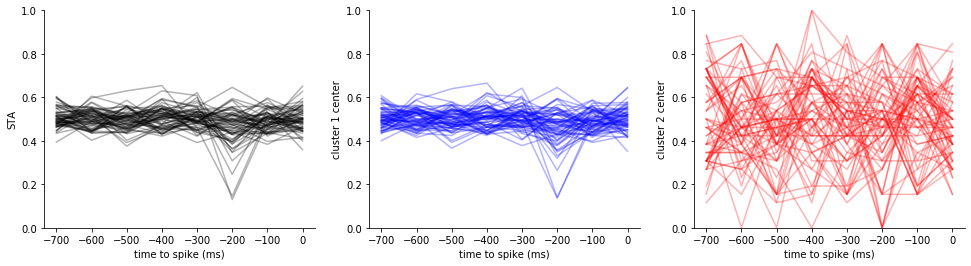

In [30]:
base_folder_name =  folder_name[:-1]
channel_name = "22b"
# channel_name = "36c"
# channel_name = "62b"

# channel_name = "42a"
# channel_name = "56b"
# channel_name = "62a"
for d in range(2, 6):
    print("dim=",d)
    print(dataset_name, channel_name)
    centers = np.load(os.path.join(base_folder_name + "{}".format(d), channel_name + ".npz"))
    
    sta = centers['sta']
    group_centers = centers['group_centers']
    
    # plot group_centers
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, group_centers, grid_T)
#     stcl.plot_centers(sta, group_centers, grid_T, cl.weights_, PSNR, [PSNR0, PSNR1])

#     plt.figure(figsize=(20,8))
#     plt.imshow(im)
#     plt.box('off')
#     plt.axis('off')
#     plt.show()

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [ ]:
# from scipy import stats

In [ ]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [ ]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])